# E2a: Küchentischversuch zum Laval-Rotor

Name: Maximilian Groß
Datum: 04.01.2024 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:
Wird die Drehzahl des Akkuschraubers bzw. die Frequenz der elektrischen Zahnbürste nach der FFT sichtbar? Falls ja, stimmen die Frequenzen mit den jeweiligen Herstellerangaben überein?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="IMG_4296.jpg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor wurde mit Klebeband am Akkuschrauber befestigt.
- Vorgangsbeschreibung: Kurz vor dem Ausführen des Messskripts wurde der Akkuschrauber angeschaltet. Während der gesamten Messdauer lief der Akkuschrauber weiter. Der Akkuschrauber wurde bei seiner Leerlaufdrehzahl von 1700 U/min betrieben.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = 'measurement_data/data_20240103_191845_MaximilianGroß_cordless_drill'  
h5_file_name = 'data_20240103_191845_MaximilianGroß_cordless_drill.h5'                          
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240103_191845_MaximilianGro\u00df_cordless_drill\\1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240103_191845_MaximilianGro\u00df_cordless_drill\\1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240103_191845_MaximilianGro\u00df_cordless_drill\\1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaa4e8-45c5-6f9f-a375-3e476aaa21d5": {
    "type": "probe",
    "name": "cordless_dri

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
# Read data
f = h5py.File(path_measurement_folder+'/'+h5_file_name,'r')

acc_x = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Acceleration_x'])
acc_y = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Acceleration_y'])
acc_z = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Acceleration_z'])
timestamps = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Timestamp'])

# Clean up starting time
timestamps = timestamps - timestamps[0]


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
# Calculate absolute acceleration
abs_acc = get_vec_accel(acc_x,acc_y,acc_z)


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

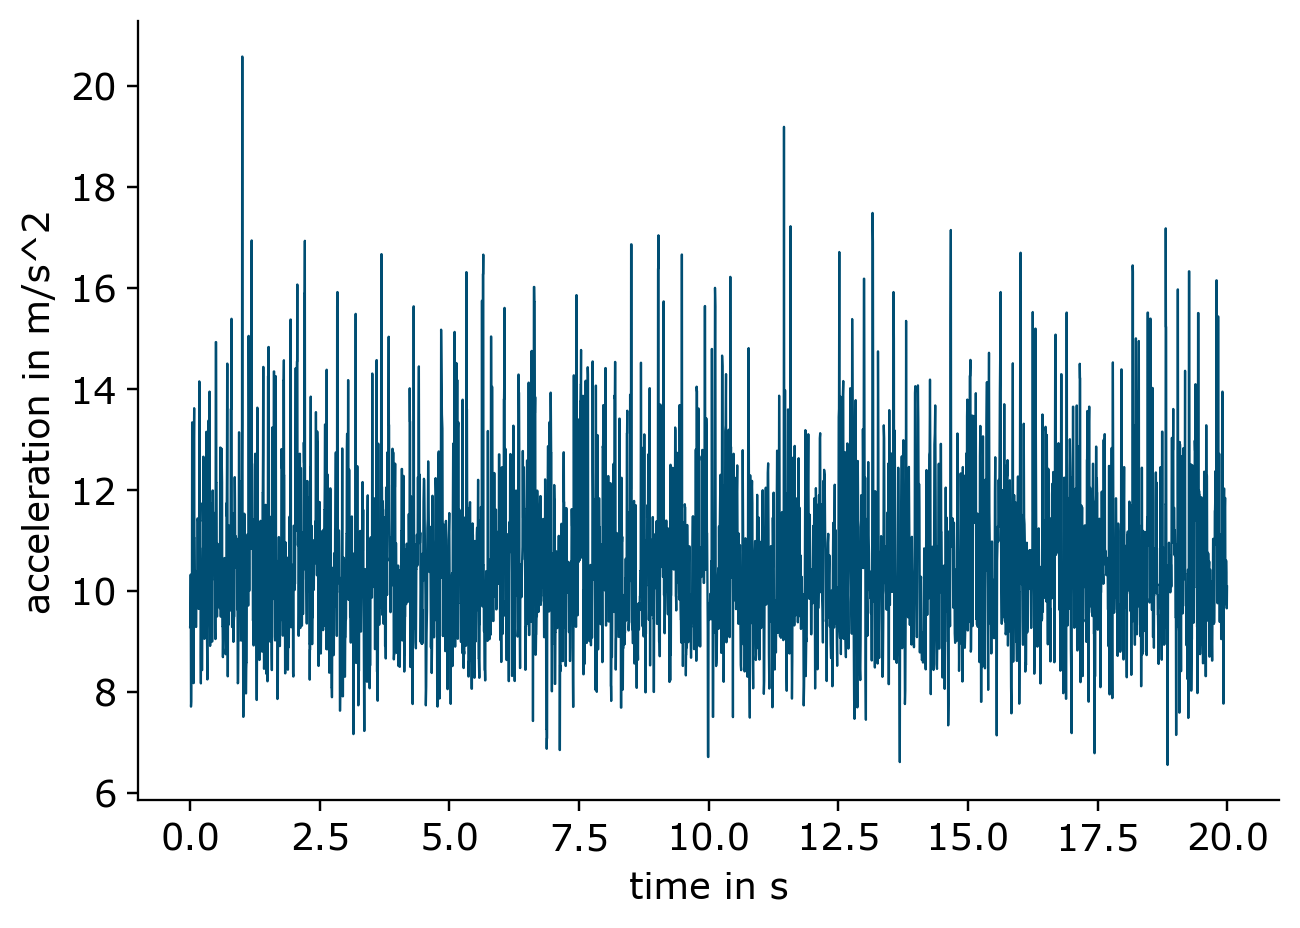

In [6]:
# Plot data
plt.plot(timestamps,abs_acc)
plt.xlabel('time in s')
plt.ylabel('acceleration in m/s^2')
plt.show()

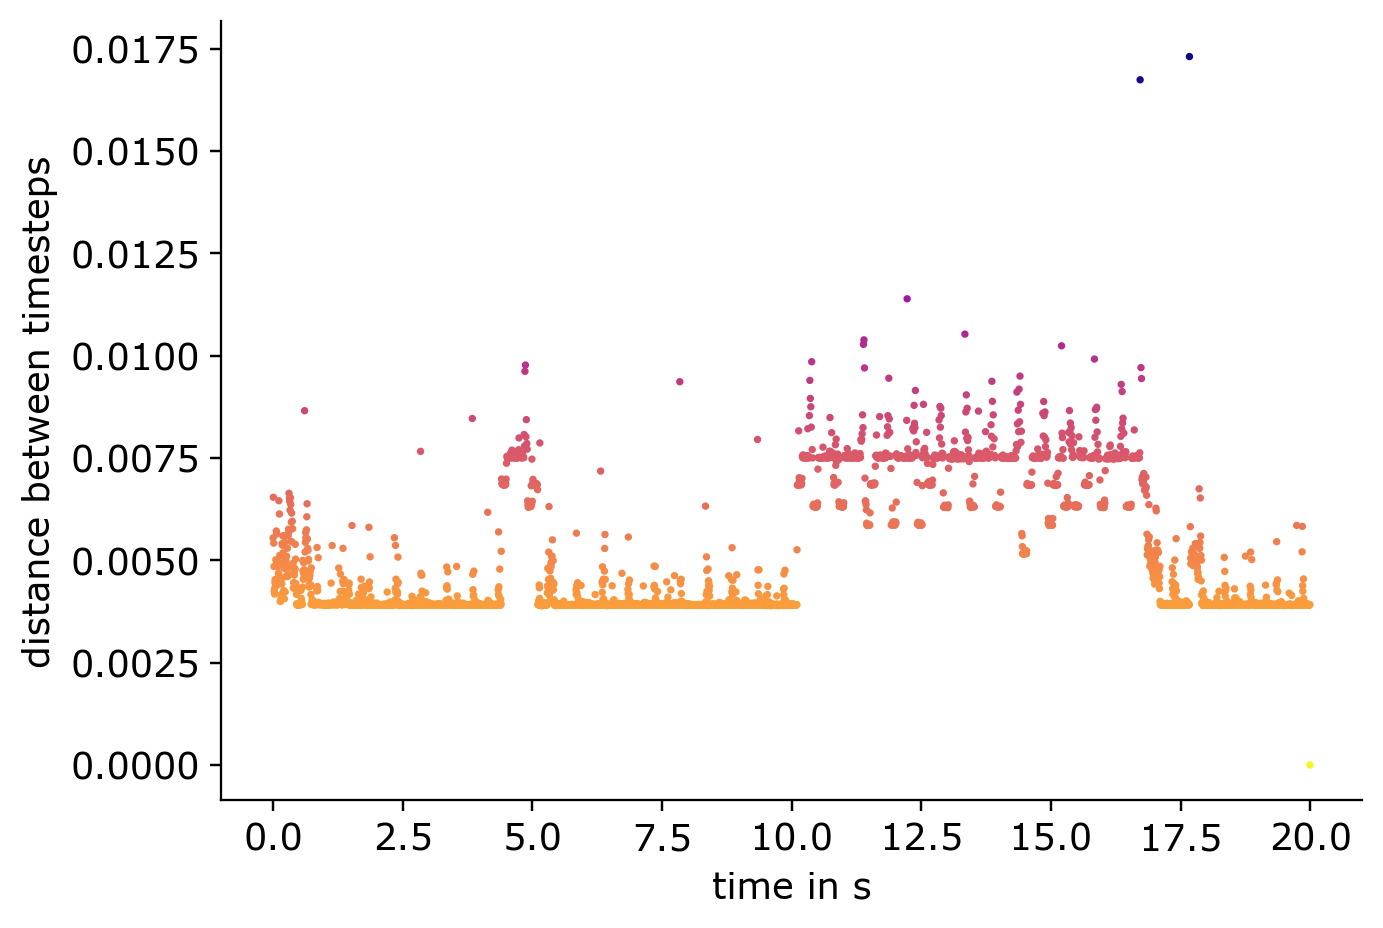

In [7]:
# Plot measuring time differences
distances = np.zeros(len(timestamps))

for idx in range(len(distances)):
    try:
        distances[idx]=timestamps[idx+1]-timestamps[idx]
    except IndexError:
        pass

plt.scatter(timestamps,distances,marker='o',s=2,c=distances,cmap='plasma_r')
plt.xlabel('time in s')
plt.ylabel('distance between timesteps')
plt.show()


#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [8]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
#----------------------------------------------------------------------------------------------------

# Interpolate data
interpolated_data = interpolation(timestamps,abs_acc)


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

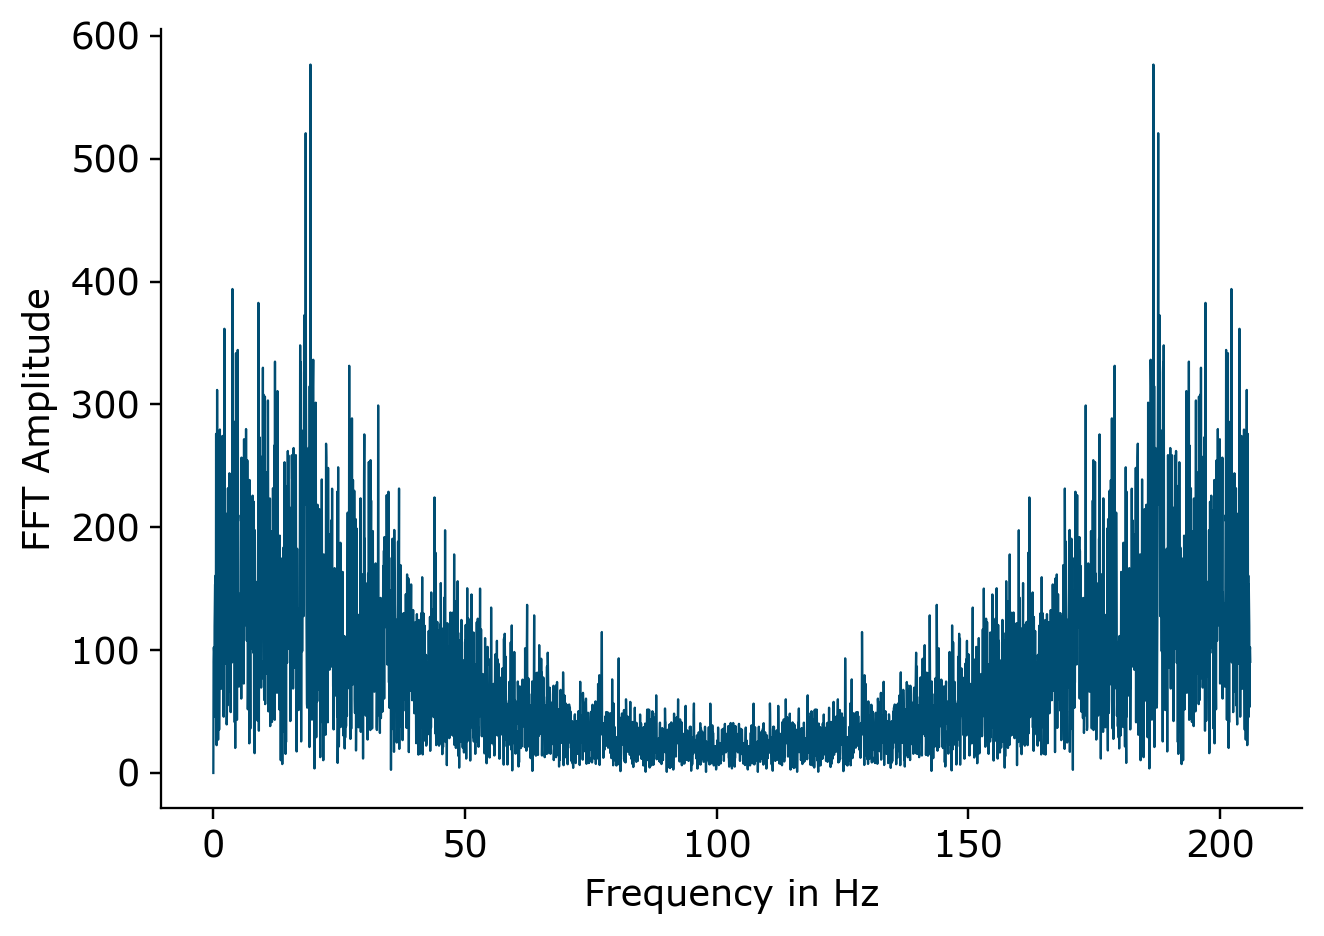

In [9]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Perform fft
FFT_data = my_fft(interpolated_data[1],interpolated_data[0])

# Plot fft results
plt.plot(FFT_data[1],FFT_data[0])
plt.xlabel('Frequency in Hz')
plt.ylabel('FFT Amplitude')
plt.show()

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="IMG_4297.jpg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor wurde mit Klebeband an der Zahnbürste befestigt.
- Vorgangsbeschreibung: Kurz vor dem Start der Messung wurde die Zahnbürste angeschaltet. Während der gesamten Messdauer lief die Zahnbürste weiter.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [10]:
# Define new paths
path_measurement_folder = 'measurement_data/data_20240103_193134_MaximilianGroß_toothbrush'  
h5_file_name = 'data_20240103_193134_MaximilianGroß_toothbrush.h5' 

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240103_193134_MaximilianGro\u00df_toothbrush\\1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240103_193134_MaximilianGro\u00df_toothbrush\\1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240103_193134_MaximilianGro\u00df_toothbrush\\1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaa4ec-ab38-6680-9795-d28e456043a7": {
    "type": "probe",
    "name": "toothbrush",
    "commen

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [11]:
# Read data
f = h5py.File(path_measurement_folder+'/'+h5_file_name,'r')

acc_x = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Acceleration_x'])
acc_y = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Acceleration_y'])
acc_z = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Acceleration_z'])
timestamps = np.array(f['RawData']['1ee847be-fddd-6ee4-892a-68c4555b0981']['Timestamp'])

# Clean up starting time
timestamps = timestamps - timestamps[0]

#### 2. Betrag der Beschleunigung berechnen


In [12]:
# Calculate absolute acceleration
abs_acc = get_vec_accel(acc_x,acc_y,acc_z)

#### 3. Darstellung der Messdaten

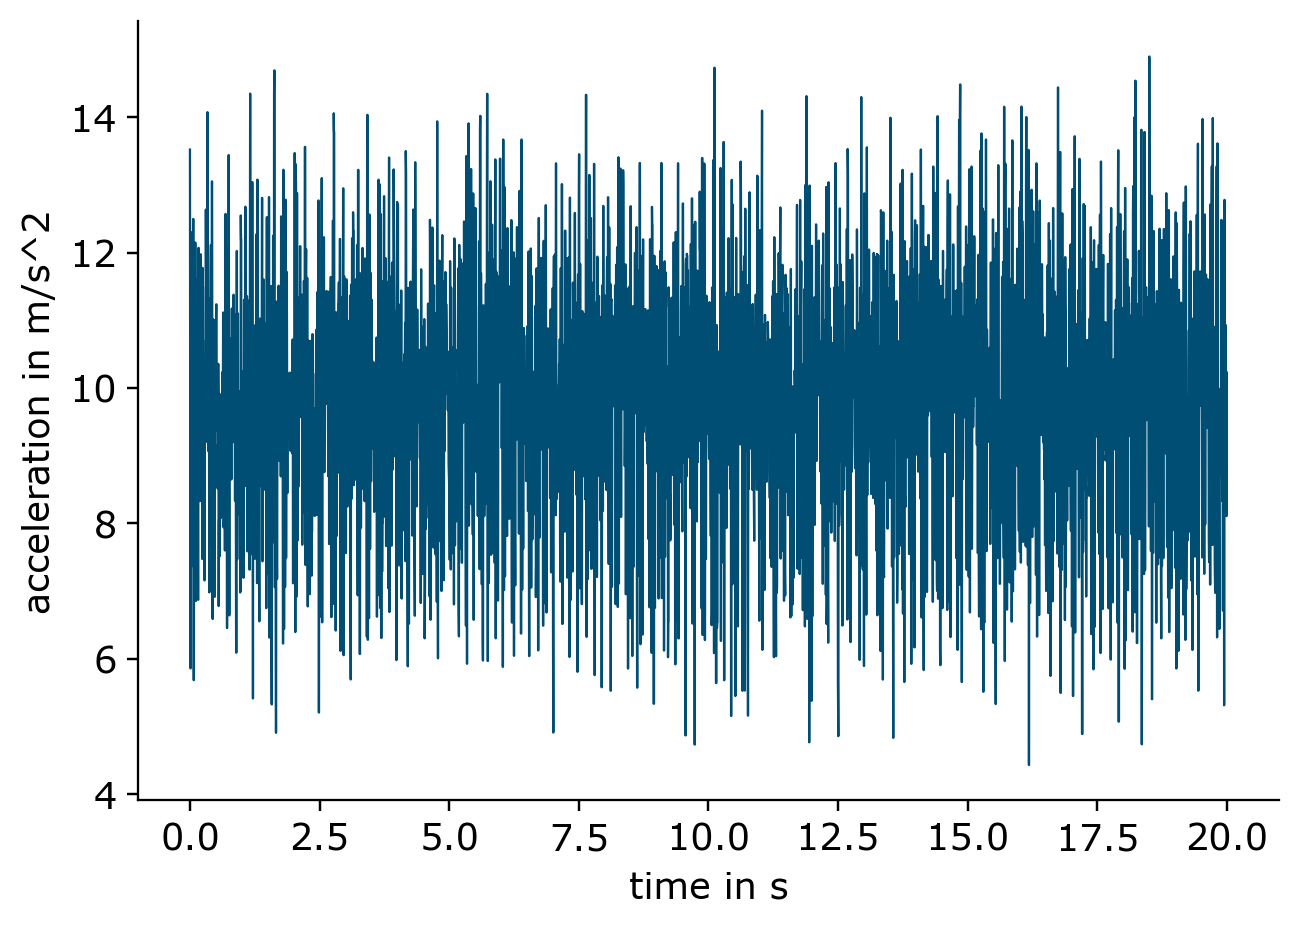

In [13]:
# Plot data
plt.plot(timestamps,abs_acc)
plt.xlabel('time in s')
plt.ylabel('acceleration in m/s^2')
plt.show()

#### 4. Interpolation der Messwerte



In [14]:
# Interpolate data
interpolated_data = interpolation(timestamps,abs_acc)

#### 5 & 6. FFT durchführen und graphisch darstellen


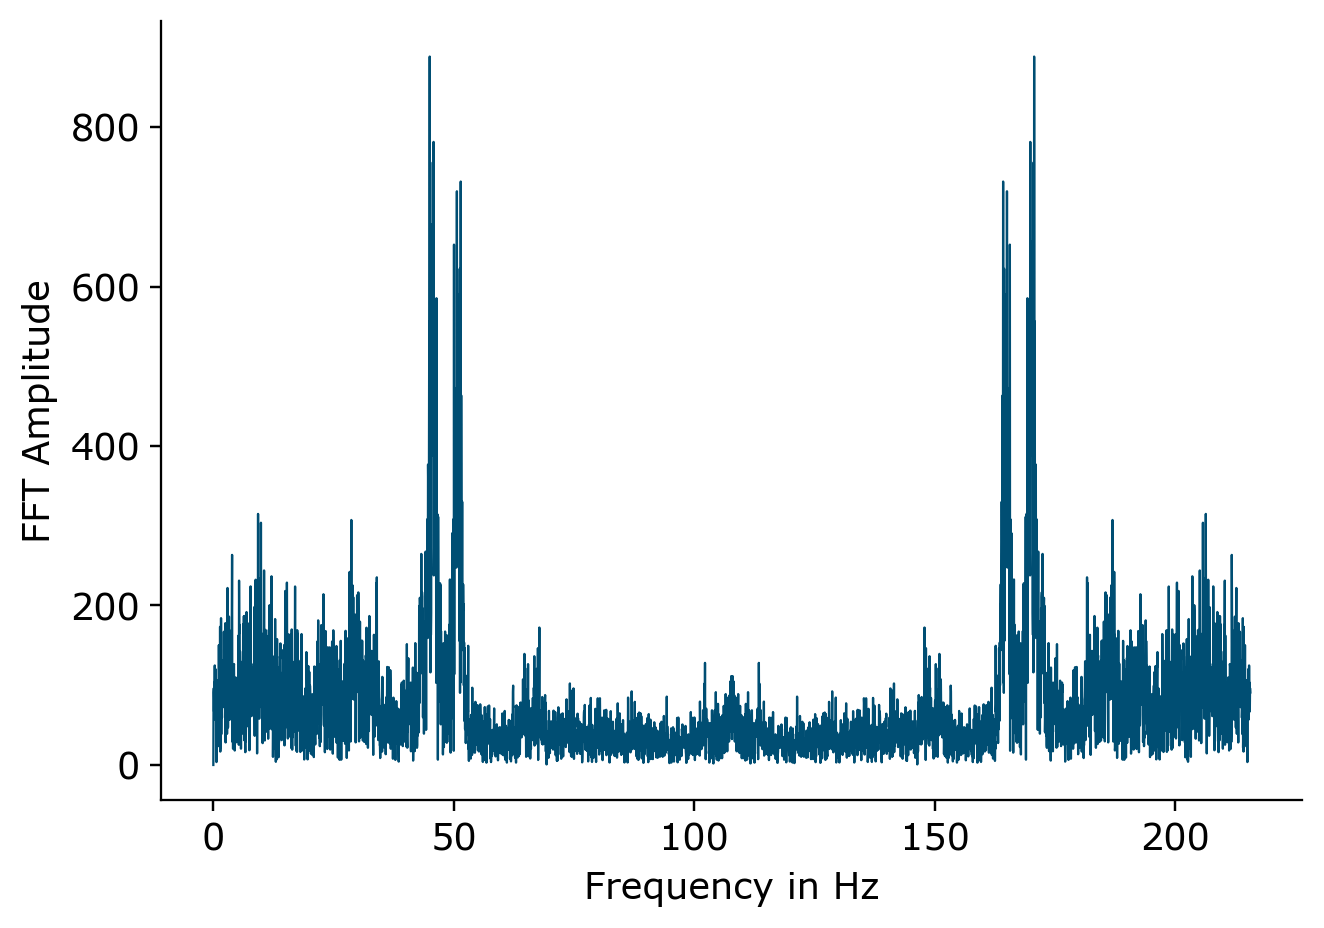

In [15]:
# Perform fft
FFT_data = my_fft(interpolated_data[1],interpolated_data[0])

# Plot fft results
plt.plot(FFT_data[1],FFT_data[0])
plt.xlabel('Frequency in Hz')
plt.ylabel('FFT Amplitude')
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Zunächst möchte ich auf die Forschungsfrage eingehen: Die Herstellerangabe der Frequenz der Zahnbürste beträgt: 10400 U/min bzw. ca. 173 Hz (Oral-B Pro Care 700). Die Leerlaufdrehzahl des Akkuschraubers beträgt: 1700 U/min bzw. ca. 28 Hz (Makita HP333D). Bei Betrachtung der Ergebnisse der FFT stellt man zunächst fest, dass die Amplitudenverteilung symmetrisch ist und es bei beiden Messungen eindeutige Amplitudenmaxima gibt. Die Symmetrie des Ergebnisses war zu erwarten, da die FFT eine diskrete Operation ist, wodurch es zu eben jener Symmetrie kommt. Die Maxima der Messung des Akkuschraubers treten bei ca. 25 Hz bzw. 190 Hz auf. Die Maxima der Messung der Zahnbürste treten bei ca. 45 Hz bzw. 170 Hz. Tatsächlich sind also die jeweilig zu grundeliegenden Frequenzen in beiden Fällen klar als Amplitudenmaxima bei der jeweiligen Frequenz erkennbar. Zunächst erscheinen diese Ergebnisse sehr passend. 

Nach erhalten des ersten Ergebnisses war ich zunächst sehr skeptisch, inwiefern das sehr gut passende Ergebniss tatsächlich korrekt sein konnte. Die Zweifel am Ergebniss waren hauptsächlich in der Befestigungsart des Sensor am Gerät begründet. Da der Sensor jeweils nur mit Klebeband am Gerät befestigt war besteht natürlich keine direkte Kopplung zwischen Gerät und Sensor. Diese Tatsache ließ mich vermuten, dass die akkurat scheinenden Messergebnisse nicht eher ein Glücksfall waren. 

Nachdem ich allerdings das zweite Ergebniss ausgewertet hatte, welches ja erneut recht akkurat schien, bin ich nun dazu geneigt den Messergebnissen mehr Vertrauen zu schenken.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Im Vergleich zu den vorangegangenen Versuchen, fand ich persönlich diesen Versuch bis jetzt den Besten. Die mittels Programmierung zu lösenden Aufgaben waren für mich interessanter als das "Metadatenmanagement" in den anderen Versuchen. Von der scheinbaren Genauigkeit der Ergebnisse war ich positiv überrascht, da der verwendete Sensor und dessen Befestigung ja sehr dem "Low-Tech"-Prinzip folgen, die erhaltenen Daten dennoch einigermaßen hochqualitativ scheinen.